# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [1]:
import pandas as pd
import dill
from collections import Counter
from matplotlib import pyplot as plt

### Helper Functions

In [2]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

### Load Data

In [3]:
winner_list = dill.load(open("results/winner_list_Q_tabular.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

Number of games played: 158500


## Method Analysis

### Tabular Q-Learning

In [4]:
batch_size = 1000
leotris_win_pct = list()
for i in range(0, len(winner_list) - batch_size, batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    

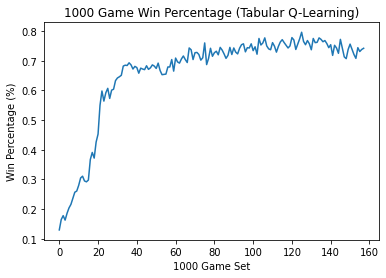

In [5]:
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()